```{contents}
```

# Intiution

## Mathematical Intiution

1.  **Initial Sample Weights**:
    *   At the beginning of the process, **all data points are assigned an equal sample weight**. For instance, if there are 7 data points, each would initially have a weight of 1/7.

2.  **Selecting the Best Decision Tree Stump (Weak Learner)**:
    *   In each iteration, Adaboost **creates and selects the "best" Decision Tree Stump**. This selection is based on criteria like **Entropy or Gini Impurity**, aiming to find the stump that best separates the data. This selected stump is the first weak learner, often denoted as `M1`.

3.  **Calculating Total Error (TE)**:
    *   After a DTS is selected, its **Total Error (TE)** is calculated. The Total Error represents the **proportion of misclassified data points** by that specific stump. For example, if 1 out of 7 data points is misclassified by the DTS, the Total Error (`TE`) would be 1/7.

4.  **Calculating the Performance of the Stump (Weight of the Weak Learner)**:
    *   A crucial step is to calculate the "Performance of Stump," denoted by `α` (alpha), which represents the **weight or contribution of the current weak learner** to the final model. This `α` is calculated using the formula:
        **`α = (1/2) * ln[(1 - TE) / TE]`**
    *   A higher `α` value indicates a better-performing stump. For example, if `TE = 1/7`, then `α1` would be approximately 0.896. This `α` value determines how much influence this specific weak learner (`M`) will have in the final Adaboost prediction function `f = α1(M1) + α2(M2) + ... + αn(Mn)`.

5.  **Updating Weights for Data Points**:
    *   After calculating the `α` for the current stump, the **weights of individual data points are updated** to focus on previously misclassified examples.
        *   For **correctly classified points**, their weights are **decreased** by multiplying their old weight by `e^(-Performance of Stump)` (i.e., `e^(-α)`). This makes them less important for the subsequent iterations.
        *   For **incorrectly classified points**, their weights are **increased** by multiplying their old weight by `e^(Performance of Stump)` (i.e., `e^(α)`). This makes misclassified points more influential for the next weak learner. For instance, a misclassified point might have its weight updated from 1/7 to 0.349.

6.  **Normalizing Weights and Assigning Bins**:
    *   The updated weights for all data points are then **normalized** so that their sum approximately equals 1.
    *   These normalized weights are used to create "Bins Assignment". Each data point is assigned a range (or "bin") within a 0-1 scale that is **proportional to its normalized weight**. Crucially, incorrectly classified points, having higher normalized weights, will be assigned **larger bins**. For example, a correctly classified point might have a bin from 0-0.08, while an incorrectly classified one might have a bin from 0.40-0.70.

7.  **Selecting Data Points for the Next Stump**:
    *   This is the mechanism for ensuring that subsequent weak learners focus on the difficult examples. For each record, a **random value between 0 and 1 is generated**. If this random value falls within a data point's assigned bin, that data point is **selected** to be sent to the next Decision Tree Stump (e.g., `DTS2`). Because misclassified points have larger bins, they have a higher probability of being selected, forcing the next weak learner to address them. This iterative process of selecting data, building a stump, calculating error and performance, and updating weights continues for multiple iterations.

8.  **Final Prediction**:
    *   After training multiple weak learners (DTS1, DTS2, ..., DTSN) through this iterative process, Adaboost makes a final prediction. For a given test data point, each individual DTS makes its prediction (e.g., Yes/No).
    *   The final prediction is then a **weighted sum of the predictions from all the weak learners**, where each weak learner's prediction (`M`) is weighted by its calculated performance score (`α`). The formula for the final prediction `f` is:
        **`f = α1(M1) + α2(M2) + α3(M3) + ... + αn(Mn)`**
    *   The final output class is determined by **summing the performance scores for each class** (e.g., 'Yes' or 'No'). The class with the higher aggregated performance score becomes the final prediction. For example, if the total weighted score for "Yes" is 1.136 and for "No" is 0.350, the final output would be "Yes".


## **Mathematical Intuition**

AdaBoost is short for **Adaptive Boosting**. It combines many weak learners into one strong learner by assigning **weights** to data points and **combining classifiers**.

---

### 1. **Setup**

* Training data: $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$ with labels $y_i \in \{-1, +1\}$.
* Each weak learner: $h_t(x) \in \{-1, +1\}$.
* Sample weights at iteration $t$: $w_i^{(t)}$.

---

### 2. **Weighted Error**

Each weak learner’s error is computed **with respect to current weights**:

$$
\epsilon_t = \frac{\sum_{i=1}^n w_i^{(t)} \cdot \mathbf{1}(h_t(x_i) \neq y_i)}{\sum_{i=1}^n w_i^{(t)}}
$$

* If $\epsilon_t < 0.5$, the learner is better than random.
* If $\epsilon_t > 0.5$, it’s worse than random → discard or flip predictions.

---

### 3. Classifier Weight (Importance)

Each weak learner gets a weight $\alpha_t$ based on its performance:

$$
\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)
$$

* Low error → high $\alpha_t$ (more influence).
* High error → low $\alpha_t$ (less influence).

---

### 4. Update Sample Weights

Misclassified samples get **higher weight** for the next round:

$$
w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_t y_i h_t(x_i))
$$

* If correctly classified → weight decreases.
* If misclassified → weight increases.

Then normalize so weights sum to 1.

---

### 5. Final Strong Classifier

After $T$ rounds, AdaBoost combines all weak learners:

$$
H(x) = \text{sign}\Bigg(\sum_{t=1}^T \alpha_t \, h_t(x)\Bigg)
$$

This is like a **weighted voting system**.

---

## **Geometrical Intuition**

Think of boosting as a **re-weighting of the feature space** and a **shifting of decision boundaries**.

---

### 1. Decision Boundaries Improve Iteratively

* A weak learner (e.g., a decision stump) draws a simple boundary.
* Points misclassified → get more weight.
* The next weak learner **focuses on these hard-to-classify regions**.
* After several iterations, the **decision boundary bends and adapts** to correctly classify more points.

---

### 2. Hyperplane View (Margin Maximization)

* The final strong classifier can be seen as a **linear combination of weak classifiers** in a high-dimensional space.
* AdaBoost effectively maximizes the **margin** (distance between points and decision boundary), similar to SVM intuition.

---

### 3. Weight Distribution as Geometry

* Imagine each data point as a “ball” with size proportional to its weight.
* Initially: all balls are the same size.
* As boosting progresses: misclassified points become “bigger” → future classifiers are forced to adjust to cover them.
* Final boundary balances correctly classifying both majority (easy) and minority (hard) points.

---

**Summary**

* **Math intuition**: AdaBoost minimizes an **exponential loss function**, reweights samples, and creates a weighted voting system of weak learners.
* **Geometry intuition**: AdaBoost bends the decision boundary step by step, **focusing on hard points** and achieving a margin-maximizing classifier.

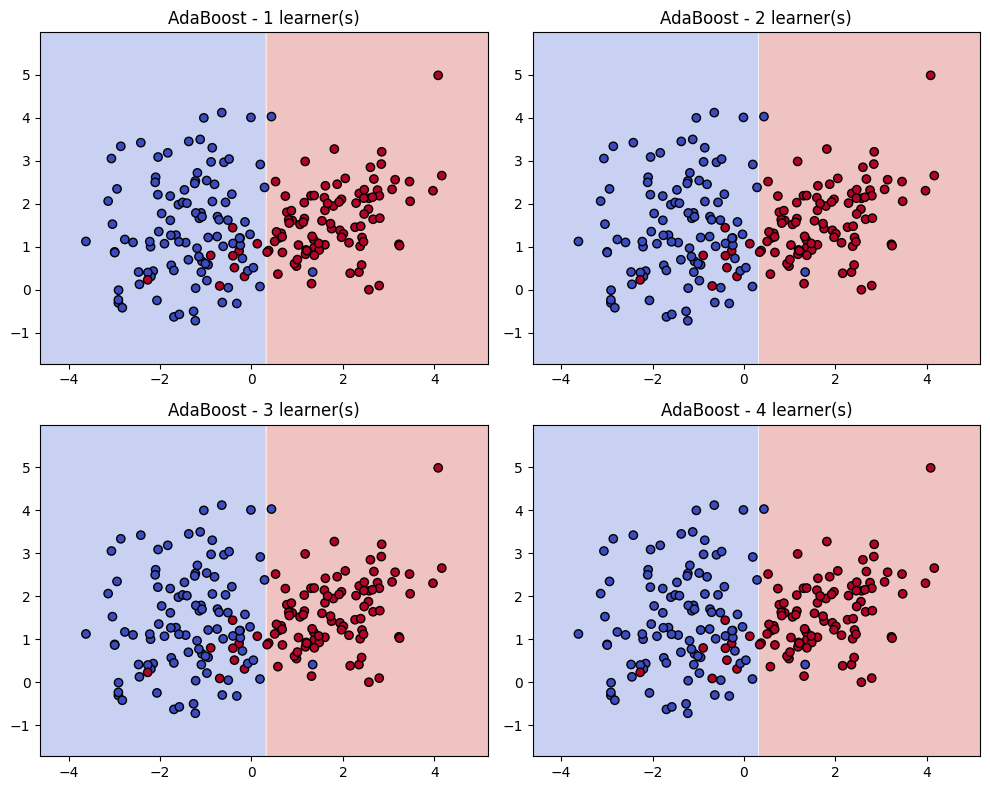

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Generate toy 2D dataset for visualization
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)
y = np.where(y == 0, -1, 1)  # map labels to -1, +1

# Train AdaBoost with decision stumps, keep intermediate learners
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=4, algorithm="SAMME", random_state=42
)
ada.fit(X, y)

# Function to plot decision boundary of a classifier
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# Plot decision boundaries after 1, 2, 3, 4 estimators
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=1):
    ada_partial = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=i, algorithm="SAMME", random_state=42
    )
    ada_partial.fit(X, y)
    plot_decision_boundary(ada_partial, X, y, ax, f"AdaBoost - {i} learner(s)")

plt.tight_layout()
plt.show()